# Execution environment

In [1]:
!pip install kaggle-environments --upgrade


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Requirement already up-to-date: kaggle-environments in /usr/local/lib/python3.6/dist-packages (1.2.2)


In [1]:
print("Import started")
from kaggle_environments import make
from kaggle_environments.envs.halite.helpers import *
import random
import math
import numpy as np
import os, glob
print("Import ended")

def store_list_of_arr(arr,path):
    a = open(path,'w')
    for i in arr:
        a.write(" ".join(list(map(str,i.tolist()))))
        a.write("\n")
    a.close()

Import started
Import ended


In [2]:
environment = make("halite", configuration={"size": 21, "startingHalite": 24000,"episodeSteps": 400}, debug=True)
state = environment.state[0]
board = Board(state.observation, environment.configuration)

# Manual Run

In [6]:
agent_count = 4
environment.reset(agent_count)
#environment.run(['geneticBot.py','geneticBot.py','geneticBot.py','geneticBot.py'])
#environment.run(['geneticBot.py'])
environment.run(['mineBot.py','old/py/mineBotv0.3.py','old/py/mineBotv0.1.py','old/py/mineBotv0.2.py'])
environment.render(mode="ipython", width=700, height=400)

Turn = 1
Turn = 2
Turn = 3
Turn = 4
Turn = 5
Turn = 6
Turn = 7
Turn = 8
Turn = 9
Turn = 10
Turn = 11
Turn = 12
Turn = 13
Turn = 14
Turn = 15
Turn = 16
Turn = 17
Turn = 18
Turn = 19
Turn = 20
Turn = 21
Turn = 22
Turn = 23
Turn = 24
Turn = 25
Turn = 26
Turn = 27
Turn = 28
Turn = 29
Turn = 30
Turn = 31
Turn = 32
Turn = 33
Turn = 34
Turn = 35
Turn = 36
Turn = 37
Turn = 38
Turn = 39
Turn = 40
Turn = 41
Turn = 42
Turn = 43
Turn = 44
Turn = 45
Turn = 46
Turn = 47
Turn = 48
Turn = 49
Turn = 50
Turn = 51
Turn = 52
Turn = 53
Turn = 54
Turn = 55
Turn = 56
Turn = 57
Turn = 58
Turn = 59
Turn = 60
Turn = 61
Turn = 62
Turn = 63
Turn = 64
Turn = 65
Turn = 66
Turn = 67
Turn = 68
Turn = 69
Turn = 70
Turn = 71
Turn = 72
Turn = 73
Turn = 74
Turn = 75
Turn = 76
Turn = 77
Turn = 78
Turn = 79
Turn = 80
Turn = 81
Turn = 82
Turn = 83
Turn = 84
Turn = 85
Turn = 86
Turn = 87
Turn = 88
Turn = 89
Turn = 90
Turn = 91
Turn = 92
Turn = 93
Turn = 94
Turn = 95
Turn = 96
Turn = 97
Turn = 98
Turn = 99
Turn = 100
Turn = 1

In [ ]:
environment.render(mode="ipython", width=700, height=400)

Turn = 1
Turn = 110


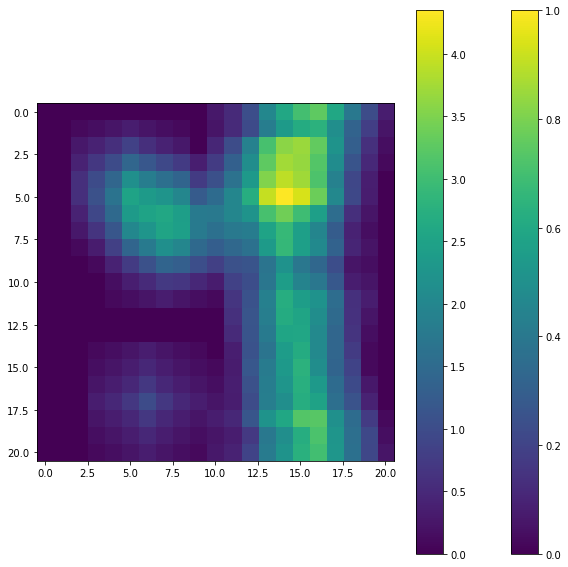

In [21]:
import json
import sys
from kaggle_environments import make
from kaggle_environments.envs.halite.helpers import *
import random
import math
import numpy as np
import os, glob
import mineBot
import importlib

importlib.reload(mineBot)
agent = mineBot.agent

directory="/Users/mark/Desktop"
player_idx=1
filename="2597354.json"

#J=json.load(open(f"{directory}/{filename}"))
J = environment.toJSON()
sys.path.append(directory)

env = make("halite")
config = env.configuration

for i, step in enumerate(J["steps"]):
    if i == 109 or i == 0:
        obs = step[0]["observation"]
        obs["player"] = player_idx
        action = agent(obs, config)

# Trainer


In [ ]:
# Runner and fitness
def run(agents,size=15,steps=400,seed=1):
    env = make("halite", configuration={"size": size, "startingHalite": ((24000/441)*size**2)//1,"episodeSteps": steps,'randomSeed':seed}, debug=False)
    env.reset(len(agents))
    env.run(agents)
    return env

def fitness_halite(env):
    state = env.state[0]
    reward = state.reward
    return reward

In [ ]:
# Agent evaluation techniques
def double_fitness(agent, n, a):
    # Run 5 1v1 against comp1.py and take average fitness_halite
    res = 0
    for randomSeed in range(a,n+a):
        print("Seed-",randomSeed)
        res += fitness_halite(run([agent,'old/py/badBotv1.0.py'],seed=randomSeed)) / n
    return res

def test_fitness(weights):
    return sum(weights)


## Init + actual training

In [ ]:
OLDBOT_COMPARISON = 9218
TRAIN_TARGET = 'geneticBot'
WEIGHT_SIZE = [4,4,1,1,2]

In [ ]:
init_weights = []

# Uniform crossover
def crossover(parent1,parent2):
    if parent1.shape != parent2.shape:
        print("Shapes must be the same!")
    result = parent1.copy()
    cross = np.random.choice([True,False],parent1.shape)
    result[cross] = parent2[cross]
    return result

# Uniform mutation by step
def mutation(target,step):
    target = target.astype('float64')
    res = target.copy()
    res += np.random.uniform(-step,step,res.shape)
    return res

def reset():
    files = glob.glob('trainweights/*')
    for f in files:
        os.remove(f)

def build(weights):
    store_list_of_arr(weights,TRAIN_TARGET+'/weights.txt')
    os.system("python3 build.py "+TRAIN_TARGET)

def convert(weights):
    # Converts a thing to a program readable list of arrays
    a = 0
    res = []
    for i in WEIGHT_SIZE:
        res.append(weights[a:a+i])
        a+=i
    return res

# Load all weights in trainweights
def load():
    res = []
    for filepath in glob.iglob('trainweights/*.txt'):
        file = open(filepath,'r')
        a = file.read()
        file.close()
        res.append(np.array(a.split()))
    return res

# Just a simple GA
def simple_train(population,step,iterations,initial=None):
    # Build new 
    N = sum(WEIGHT_SIZE)
    batch = None

    #Should we initialize with random
    if initial != None:
        batch = initial
        a = 0
        if len(initial) != population:
            a = population - len(inital)
        for i in range(a):
            batch.append(np.random.uniform(-step*10,step*10,(N)))
    else:
        batch = [np.random.uniform(-step*10,step*10,(N))for pop in range(population)]

    for i in range(iterations):

        print("====================")
        print("Iteration", i, "starting")
        if i % 1 == 0: #Tunable
            print("Saving all weights")
            reset()
            for j,agent in enumerate(batch):
                store_list_of_arr(convert(agent),'trainweights/'+str(j)+".txt")

        a = random.randint(10,100)
        print("Training seed ")
        # Training
        scores = []
        for agent in batch:
            build(convert(agent))
            scores.append([double_fitness(TRAIN_TARGET+".py",1,a),agent])
            # Shit never actually built a shipyard (most likely)
            if scores[-1][0] == 5000.0:
                scores[-1][0] = 0
            print("Agent calculated",scores[-1][0])
        scores.sort(reverse=True,key=lambda x:x[0])

        # TODO: Account for diversity
        print("Maximum: ",max(scores,key=lambda x:x[0]))

        # Take the top 25%
        top = population // 4
        stay = [x[1] for x in scores[0:top]]
        mutate = [mutation(x,step) for x in stay]
        cross = [crossover(random.choice(stay),random.choice(stay)) for x in stay]
        both = [mutation(crossover(random.choice(stay),random.choice(stay)),step) for x in stay]
        batch = stay + mutate + cross + both
    

In [ ]:
simple_train(40,0.3,15,load())

In [ ]:
weights='''1.065318617455976 542.1433864410643 0.7511632555608448 0.6945893010559424 0.1341607259959342 -256.54011220873883
0.0010006686129102006 2.3837319660395457 0.4770079274532575 14.871982834273645 5.837852094972167
0.04043743652542793 219.09952521708655 9.561641308515489 1.1406984927798645 0.4806089913651024 11.485903586701356
0.24844607946009314 0.03783341427621351
1 0 0
112.69692418951784
3 0.1'''
# Contains all dependencies used in bot
# First file loaded

from kaggle_environments import make
from kaggle_environments.envs.halite.helpers import *
import math, random
import numpy as np
import scipy.optimize
import scipy.ndimage
from queue import PriorityQueue

# Global constants

    # Infinity value thats actually not infinity
INF = 999999999999
    # All game state goes here - everything, even mundane
state = {}

    # Bot training weights
        # 0 - shipyard reward
        # 1 - mine reward
        # 2 - attack weights
        # 3 - return weights
        # 4 - spawn weights
        # 5 - guard weights
        # 6 - navigation weights
    
temp = []
weights = weights.split('\n')
for line in weights:
    temp.append(np.array(list(map(float,line.split()))))
weights = temp

# Init function - called at the start of each game
def init(board):
    global state
    np.set_printoptions(precision=3)
    state['configuration'] = board.configuration
    state['me'] = board.current_player_id
    state['playerNum'] = len(board.players)
    state['memory'] = {}

    pass

# Run start of every turn
def update(board):
    global action
    action = {}
    state['currentHalite'] = board.current_player.halite
    state['next'] = np.zeros((board.configuration.size,board.configuration.size))
    state['board'] = board
    state['memory'][board.step] = board
    state['cells'] = board.cells.values()
    state['ships'] = board.ships.values()
    state['myShips'] = board.current_player.ships
    state['shipyards'] = board.shipyards.values()
    state['myShipyards'] = board.current_player.shipyards

    # Calc processes
    encode()

# General random helper functions that are not strictly "process" or in "nav"

# Map from 0 to 1
def normalize(v):
    norm = np.linalg.norm(v,np.inf)
    if norm == 0: 
       return v
    return v / norm

def closest_ship(t):
    return closest_thing(t,state['myShips'])

def closest_thing(t,arr):
    res = None
    for thing in arr:
        if res == None:
            res = thing
        elif dist(t,res.position) > dist(t,thing.position):
            res = thing
    return res

def closest_thing_position(t,arr):
    res = None
    for thing in arr:
        if res == None:
            res = thing
        elif dist(t,res) > dist(t,thing):
            res = thing
    return res

def halite_per_turn(deposit, shipTime, returnTime):
    travelTime = shipTime + returnTime
    actualDeposit = min(500,deposit * 1.02 ** shipTime)
    maximum = 0
    for turns in range(1,10):
        mined = (1 - .75**turns) * actualDeposit
        perTurn = mined / (turns+travelTime)
        maximum = perTurn if perTurn > maximum else maximum
    return maximum
def miner_num():
    if state['board'].step < 300:
        return min(len(state['myShips']),int(state['haliteMean'] / 2 + len(state['myShipyards'])))
    else:
        return len(state['myShips'])


# Core strategy

action = {}  # ship -> (value,ship,target)
farms = [] # list of cells to farm

def farm_tasks():
    control_farm()
    if len(farms) < 4 * len(state['myShipyards']):
        build_farm()
    # Create patrols

def ship_tasks():  # update action
    global action
    cfg = state['configuration']
    board = state['board']
    me = board.current_player
    tasks = {}
    shipsToAssign = []

    # Split attack ships and mine ships
    temp = []
    state['attackers'] = []
    for ship in state['enemyShips']:
        if ship.halite != 0:
            temp.append(ship)
    if len(temp) > 0:
        minerNum = miner_num()
        attackerNum = len(state['myShips']) - minerNum
        for ship in me.ships:
            if ship in action:
                continue
            if attackerNum > 0:
                attackerNum -= 1
                state['attackers'].append(ship)

    # All ships rule based
    for ship in me.ships:
        # Flee
        for target in get_adjacent(ship.position):
            if board.cells[target].ship != None:
                targetShip = board.cells[target].ship
                if targetShip.player.id != state['me'] and targetShip.halite < ship.halite:
                    action[ship] = (INF*2+ship.halite, ship, state['closestShipyard'][ship.position.x][ship.position.y])

        if ship in action:
            continue # continue its current action

        # End-game return
        if board.step > state['configuration']['episodeSteps'] - cfg.size * 2 and ship.halite > 0:
            action[ship] = (ship.halite, ship, state['closestShipyard'][ship.position.x][ship.position.y])
        # End game attack
        if len(state['board'].opponents) > 0 and board.step > state['configuration']['episodeSteps'] - cfg.size * 1.5 and ship.halite == 0:
            if len(state['myShipyards']) > 0 and ship == closest_thing(state['myShipyards'][0].position,state['myShips']):
                action[ship] = (0,ship,state['myShipyards'][0].position)
                continue
            killTarget = state['killTarget']
            if len(killTarget.shipyards) > 0:
                target = closest_thing(ship.position,killTarget.shipyards)
                action[ship] = (ship.halite, ship, target.position)
            elif len(killTarget.ships) > 0:
                target = closest_thing(ship.position,killTarget.ships)
                action[ship] = (ship.halite, ship, target.position)

        if ship in action or ship in state['attackers']:
            continue

        shipsToAssign.append(ship)

    # Rule based: Attackers
    print(len(state['myShips']))
    print(len(state['attackers']))
    attack(state['attackers'])

    # Reward based: Mining + Guarding + Control
    targets = [] # (cell, type)
    for i in board.cells.values():  # Filter targets
        if i.shipyard != None and i.shipyard.player_id == state['me']:
            targets.append((i,'guard'))
            for j in range(min(6,len(state['myShips']))):
                targets.append((i,'cell'))
            continue
        if i.halite < 15 and i.ship == None and i.shipyard == None:
            # Spots not very interesting
            continue
        if i.ship != None and i.ship.player_id != state['me']:
            if i.ship.halite == 0 and state['controlMap'][i.position.x][i.position.y] < 0:
                continue
        targets.append((i,'cell'))
    rewards = np.zeros((len(shipsToAssign), len(targets)))
    for i, ship in enumerate(shipsToAssign):
        for j, target in enumerate(targets):
            rewards[i, j] = get_reward(ship, target)          
    rows, cols = scipy.optimize.linear_sum_assignment(rewards, maximize=True)  # rows[i] -> cols[i]
    for r, c in zip(rows, cols):
        task = targets[c]
        if task[1] == 'cell':
            action[shipsToAssign[r]] = (rewards[r][c], shipsToAssign[r], targets[c][0].position)
        elif task[1] == 'guard':
            action[shipsToAssign[r]] = (0, shipsToAssign[r], targets[c][0].position)

    # Process actions
    actions = list(action.values())
    actions.sort(reverse=True, key=lambda x: x[0])
    for act in actions:
        process_action(act)

def process_action(act):
    global action
    if action[act[1]] == True:
        return act[1].next_action
    action[act[1]] = True
    # Processing
    act[1].next_action = d_move(act[1], act[2], state[act[1]]['blocked'])
    # Ship convertion
    sPos = act[1].position
    if state['closestShipyard'][sPos.x][sPos.y] == sPos and state['board'].cells[sPos].shipyard == None:
        act[1].next_action = ShipAction.CONVERT
    return act[1].next_action

def spawn_tasks():
    shipyards = state['board'].current_player.shipyards
    shipyards.sort(reverse=True, key=lambda shipyard: state['haliteSpread'][shipyard.position.x][shipyard.position.y])

    for shipyard in shipyards:
        if state['currentHalite'] >= 500 and not state['next'][shipyard.cell.position.x][shipyard.cell.position.y]:
            if state['shipValue'] >= 500:
                shipyard.next_action = ShipyardAction.SPAWN
                state['currentHalite'] -= 500
            elif len(state['myShips']) < 1 and shipyard == shipyards[0]:
                shipyard.next_action = ShipyardAction.SPAWN
                state['currentHalite'] -= 500
            elif len(state['myShipyards']) == 1:
                for pos in get_adjacent(shipyard.position):
                    cell = state['board'].cells[pos]
                    if cell.ship != None and cell.ship.player_id != state['me']:
                        shipyard.next_action = ShipyardAction.SPAWN
                        state['currentHalite'] -= 500
                        return

def convert_tasks():
    global action

    # Add convertion tasks

    currentShipyards = state['myShipyards']  # Shipyards "existing"
    targetShipyards = currentShipyards[:]

    # Maximum cell
    v = shipyard_value(state['board'].cells[Point(0,0)])
    t = state['board'].cells[Point(0,0)]
    for cell in state['board'].cells.values():
        a = shipyard_value(cell)
        if v < a:
            v = a
            t = cell
    tx, ty = t.position.x,t.position.y
    # Calculate the reward for each cell
    if state['board'].step == 0:
        # Build immediately
        targetShipyards.append(state['board'].cells[state['myShips'][0].position])
        action[state['myShips'][0]] = (math.inf, state['myShips'][0], state['myShips'][0].position)
        state['currentHalite'] -= 500
    elif len(currentShipyards) == 0:
        # Grab the closest possible ship to the target and build.
        possibleShips = []
        for ship in state['myShips']:
            if ship.halite + state['currentHalite'] >= 500:
                possibleShips.append(ship)
        closest = closest_thing(Point(tx, ty),possibleShips)
        if closest != None:
            action[closest] = (math.inf, closest, Point(tx, ty))
        targetShipyards.append(state['board'].cells[Point(tx, ty)])
        state['currentHalite'] -= 500
    elif v > 500 and v > state['shipValue']:
        targetShipyards.append(state['board'].cells[Point(tx, ty)])
        state['currentHalite'] -= 500

    state['closestShipyard'] = closest_shipyard(targetShipyards)

def build_farm():
    global farms
    maxCell = None
    v = 0

    for cell in state['board'].cells.values():
        if cell.position in farms:
            continue
        a = farm_value(cell)
        if a > v:
            maxCell = cell
            v = a

    if maxCell != None:
        farms.append(maxCell.position)

def control_farm():
    global farms
    for i,farm in enumerate(farms[:]):
        if state['board'].cells[farm].halite < state['haliteMean'] / 1.5 or dist(farm,state['closestShipyard'][farm.x][farm.y]) > 8:
            # Not worth it
            farms.remove(farm)

# General calculations whose values are expected to be used in multiple instances
# Basically calc in botv1.0. 
# Run in update() - see dependency.py

def encode():
    global state
    
    N = state['configuration'].size

    # Halite 
    state['haliteMap'] = np.zeros((N, N))
    for cell in state['cells']:
        state['haliteMap'][cell.position.x][cell.position.y] = cell.halite
    # Halite Spread
    state['haliteSpread'] = np.copy(state['haliteMap'])
    for i in range(1,5):
        state['haliteSpread'] += np.roll(state['haliteMap'],i,axis=0) * 0.5**i
        state['haliteSpread'] += np.roll(state['haliteMap'],-i,axis=0) * 0.5**i
    temp = state['haliteSpread'].copy()
    for i in range(1,5):
        state['haliteSpread'] += np.roll(temp,i,axis=1) * 0.5**i
        state['haliteSpread'] += np.roll(temp,-i,axis=1) *  0.5**i
    # Ships
    state['shipMap'] = np.zeros((state['playerNum'], N, N))
    state['enemyShips'] = []
    for ship in state['ships']:
        state['shipMap'][ship.player_id][ship.position.x][ship.position.y] = 1
        if ship.player_id != state['me']:
            state['enemyShips'].append(ship)
    # Shipyards
    state['shipyardMap'] = np.zeros((state['playerNum'], N, N))
    state['enemyShipyards'] = []
    for shipyard in state['shipyards']:
        state['shipyardMap'][shipyard.player_id][shipyard.position.x][shipyard.position.y] = 1
        if shipyard.player_id != state['me']:
            state['enemyShipyards'].append(shipyard)
    # Total Halite
    state['haliteTotal'] = np.sum(state['haliteMap'])
    # Mean Halite 
    state['haliteMean'] = state['haliteTotal'] / (N**2)
    # Estimated "value" of a ship
    #totalShips = len(state['ships'])
    #state['shipValue'] = state['haliteTotal'] / state
    state['shipValue'] = ship_value()
    # Friendly units
    state['ally'] = state['shipMap'][state['me']]
    # Friendly shipyards
    state['allyShipyard'] = state['shipyardMap'][state['me']]
    # Enemy units
    state['enemy'] = np.sum(state['shipMap'], axis=0) - state['ally']
    # Enemy shipyards
    state['enemyShipyard'] = np.sum(state['shipyardMap'], axis=0) - state['allyShipyard']
    # Closest shipyard
    state['closestShipyard'] = closest_shipyard(state['myShipyards'])
    # Control map
    state['controlMap'] = control_map(state['ally']-state['enemy'],state['allyShipyard']-state['enemyShipyard'])
    state['negativeControlMap'] = control_map(-state['enemy'],-state['enemyShipyard'])
    #Enemy ship labeled by halite. If none, infinity
    state['enemyShipHalite'] = np.zeros((N, N))
    state['enemyShipHalite'] += np.Infinity
    for ship in state['ships']:
        if ship.player.id != state['me']:
            state['enemyShipHalite'][ship.position.x][ship.position.y] = ship.halite
    # Avoidance map (Places not to go for each ship)
    for ship in state['myShips']:
        state[ship] = {}
        state[ship]['blocked'] = get_avoidance(ship)
        state[ship]['danger'] = get_danger(ship.halite)
    # Who we should attack
    if len(state['board'].opponents) > 0:
        state['killTarget'] = get_target()
    
def get_avoidance(s):
    threshold = s.halite
    #Enemy units
    temp = np.where(state['enemyShipHalite'] < threshold, 1, 0)
    enemyBlock = np.copy(temp)
    enemyBlock = enemyBlock + np.roll(temp,1,axis=0)
    enemyBlock = enemyBlock + np.roll(temp,-1,axis=0)
    enemyBlock = enemyBlock + np.roll(temp,1,axis=1)
    enemyBlock = enemyBlock + np.roll(temp,-1,axis=1)

    enemyBlock = enemyBlock + state['enemyShipyard']

    blocked = enemyBlock
    blocked = np.where(blocked>0,1,0)
    return blocked

def get_danger(s):
    threshold = s
    dangerMap = np.where(state['enemyShipHalite'] < threshold, 1, 0)
    temp = dangerMap.copy()
    for i in range(1,4):
        dangerMap = np.add(dangerMap,np.roll(temp,i,axis=0) * 0.7**i,casting="unsafe")
        dangerMap += np.roll(temp,-i,axis=0) * 0.7**i
    temp = dangerMap.copy()
    for i in range(1,4):
        dangerMap += np.roll(temp,i,axis=1) * 0.7**i
        dangerMap += np.roll(temp,-i,axis=1) * 0.7**i
    return dangerMap
    

def closest_shipyard(shipyards):
    N = state['configuration'].size
    res = [[None for y in range(N)]for x in range(N)]
    for x in range(N):
        for y in range(N):
            minimum = math.inf
            for shipyard in shipyards:
                if dist(Point(x,y),shipyard.position) < minimum:
                    minimum = dist(Point(x,y),shipyard.position)
                    res[x][y] = shipyard.position
    return res
    
def control_map(ships,shipyards):
        ITERATIONS = 3

        res = np.copy(ships)
        for i in range(1,ITERATIONS+1):
            res += np.roll(ships,i,axis=0) * 0.5**i
            res += np.roll(ships,-i,axis=0) * 0.5**i
        temp = res.copy()
        for i in range(1,ITERATIONS+1):
            res += np.roll(temp,i,axis=1) * 0.5**i
            res += np.roll(temp,-i,axis=1) * 0.5**i
        
        return res + shipyards
        

def get_target():
    board = state['board']
    me = board.current_player
    idx,v = 0, -math.inf
    for i,opponent in enumerate(board.opponents):
        value = 0
        if opponent.halite-me.halite > 0:
            value = -(opponent.halite-me.halite)
        else:
            value = (opponent.halite-me.halite) * 5
        if value > v:
            v = value
            idx = i
    return board.opponents[idx]

# Direction from point s to point t
def direction_to(s: Point, t: Point) -> ShipAction:
    candidate = directions_to(s, t)
    return random.choice(candidate) if len(candidate) > 0 else None

# Distance from point a to b
def dist(a: Point, b: Point) -> int:
    N = state['configuration'].size
    return min(abs(a.x - b.x), N - abs(a.x - b.x)) + min(abs(a.y - b.y), N - abs(a.y - b.y))

# Returns list of possible directions
def directions_to(s: Point, t: Point) -> ShipAction:
    N = state['configuration'].size
    candidates = [] # [N/S, E/W]
    if s.x-t.x != 0:
        candidates.append(ShipAction.WEST if (s.x-t.x) % N < (t.x-s.x) % N else ShipAction.EAST)
    if s.y-t.y != 0:
        candidates.append(ShipAction.SOUTH if (s.y-t.y) % N < (t.y-s.y) % N else ShipAction.NORTH)
    return candidates

# Deserialize an integer which represents a point
def unpack(n) -> Point:
    N = state['configuration'].size
    return Point(n // N, n % N)

# A default direction to target
def direction_to(s: Point, t: Point) -> ShipAction:
    candidate = directions_to(s, t)
    return random.choice(candidate) if len(candidate) > 0 else None

# Returns the "next" point of a ship at point s with shipAction d
def dry_move(s: Point, d: ShipAction) -> Point:
    N = state['configuration'].size
    if d == ShipAction.NORTH:
        return s.translate(Point(0, 1),N)
    elif d == ShipAction.SOUTH:
        return s.translate(Point(0, -1),N)
    elif d == ShipAction.EAST:
        return s.translate(Point(1, 0),N)
    elif d == ShipAction.WEST:
        return s.translate(Point(-1, 0),N)
    else:
        return s
    
# Returns list of len 4 of adjacent points to a point
def get_adjacent(point):
    N = state['configuration'].size
    res = []
    for offX, offY in ((0,1),(1,0),(0,-1),(-1,0)):
        res.append(point.translate(Point(offX,offY),N))
    return res
    
def safe_naive(s,t,blocked):
    for direction in directions_to(s.position,t):
        target = dry_move(s.position,direction)
        if not blocked[target.x][target.y]:
            return direction
    return None

def move_cost(s : Ship, t : Point):
    navigationWeights = weights[6]
    cost = state[s]['danger'][t.x][t.y] * navigationWeights[1]
    for pos in get_adjacent(t):
        if state['enemyShipHalite'][pos.x][pos.y] == s.halite:
            cost += navigationWeights[0]
    return cost

# Dijkstra's movement
def d_move(s : Ship, t : Point, inBlocked):

    nextMap = state['next']
    sPos = s.position
    blocked = inBlocked + nextMap
    # Check if we are trying to attack
    if state['board'].cells[t].ship != None:
        target = state['board'].cells[t].ship
        if target.player_id != state['me'] and target.halite == s.halite:
            blocked[t.x][t.y] -= 1
    elif state['board'].cells[t].shipyard != None and state['board'].cells[t].shipyard.player_id != state['me']:
        blocked[t.x][t.y] -= 1
    # Don't ram stuff thats not the target. Unless we have an excess of ships. Or we are trying to murder a team.
    if len(state['myShips']) < 30 and state['board'].step < state['configuration']['episodeSteps'] - state['configuration'].size * 1.5:
        blocked += np.where(state['enemyShipHalite'] == s.halite, 1, 0)

    blocked = np.where(blocked>0,1,0)

    desired = None

    #Stay still
    if sPos == t or nextMap[t.x][t.y]:

        #Someone with higher priority needs position, must move. Or being attacked.
        if blocked[t.x][t.y]:
            for processPoint in get_adjacent(sPos):
                if not blocked[processPoint.x][processPoint.y]:
                    nextMap[processPoint.x][processPoint.y] = 1
                    desired = direction_to(sPos,processPoint)
                    t = processPoint
            if desired == None:
                target = micro_run(s)
                t = dry_move(sPos,target)
                desired = target
        else:
            t = sPos
            desired = None
    else:
        #Dijkstra
        pred = {}
        calcDist = {}
        pq = PriorityQueue()
        pqMap = {}

        pqMap[dist(sPos,t)] = [sPos]
        pq.put(dist(sPos,t))
        pred[sPos] = sPos
        calcDist[sPos] = dist(sPos,t)

            # Main

        while not pq.empty():
            if t in calcDist:
                break
            currentPoint = pqMap.get(pq.get()).pop()
            for processPoint in get_adjacent(currentPoint):
                if blocked[processPoint.x][processPoint.y] or processPoint in calcDist: 
                    continue
                calcDist[processPoint] = calcDist[currentPoint] + 1 + move_cost(s,processPoint)
                priority = calcDist[processPoint]
                pqMap[priority] = pqMap.get(priority,[])
                pqMap[priority].append(processPoint)
                pq.put(priority)
                pred[processPoint] = currentPoint

        if not t in pred:

            # Can go in general direction
            res = safe_naive(s,t,blocked)
            if res != None:
                t = dry_move(s.position,res)
                desired = res
            else:
                #Random move
                for processPoint in get_adjacent(sPos):
                    if not blocked[processPoint.x][processPoint.y]:
                        nextMap[processPoint.x][processPoint.y] = 1
                        t = processPoint
                        desired = direction_to(sPos,processPoint)
                
                # Run
                if desired == None and blocked[sPos.x][sPos.y]:
                    target = micro_run(s)
                    t = dry_move(sPos,target)
                    desired = target
                elif not blocked[sPos.x][sPos.y]:
                    t = sPos
                    desired = None        
        else:
            # Path reconstruction
            while pred[t] != sPos:
                t = pred[t]

            desired = direction_to(sPos,t)

    # Reduce collisions
    if desired != None and state['board'].cells[t].ship != None and state['board'].cells[t].ship.player_id == state['me']:
        target = state['board'].cells[t].ship
        s.next_action = desired
        if action[target] != True:
            nextMap[t.x][t.y] = 1
            result = process_action(action[target])
            # Going there will kill it
            if result == None:
                desired = d_move(s,t,inBlocked)
                nextMap[t.x][t.y] = 0
                t = dry_move(sPos,desired)
    nextMap[t.x][t.y] = 1
    return desired

# Ship might die, RUN!
def micro_run(s):
    sPos = s.position
    nextMap = state['next']

    if state[s]['blocked'][sPos.x][sPos.y]:
        if s.halite > 500:
            return ShipAction.CONVERT
        score = [0,0,0,0]
        for i,pos in enumerate(get_adjacent(sPos)):
            if nextMap[pos.x][pos.y]:
                score[i] = -1
            elif state['board'].cells[pos].ship != None and state['board'].cells[pos].ship.player_id != state['me']:
                if state['board'].cells[pos].ship.halite >= s.halite:
                    score[i] = 100000
                else:
                    score[i] += state['board'].cells[pos].ship.halite 
            else:
                score[i] = 5000

            score[i] += state['controlMap'][pos.x][pos.y]

        i, maximum = 0,0 
        for j, thing in enumerate(score):
            if thing > maximum:
                i = j
                maximum = thing
        if maximum < 10:
            return None
        else:
            return direction_to(sPos,get_adjacent(sPos)[i])
    else:
        return None






# Key function
# For a ship, return the inherent "value" of the ship to get to a target cell

def get_reward(ship,target):
    
    cell = target[0]
    res = 0
    # Don't be stupid
    if state[ship]['blocked'][cell.position.x][cell.position.y] and cell.shipyard == None:
        res = 0
    elif target[1] == 'cell':
        # Mining reward
        if (cell.ship is None or cell.ship.player_id == state['me']) and cell.halite > 0:
            res = mine_reward(ship,cell)
        elif cell.ship is not None and cell.ship.player_id != state['me']:
            res = attack_reward(ship,cell)
        elif cell.shipyard is not None and cell.shipyard.player_id == state['me']:
            res = return_reward(ship,cell)
        elif cell.shipyard is not None and cell.shipyard.player_id != state['me']:
            res = attack_reward(ship,cell)
    elif target[1] == 'guard':
        res = guard_reward(ship,cell)
    return res

def guard_reward(ship,cell):
    cPos = cell.position
    sPos = ship.position
    guardWeights = weights[5]
    if len(state['enemyShips']) == 0:
        return 0
    closestEnemy = closest_thing(ship.position,state['enemyShips'])
    if dist(sPos,cPos) > dist(closestEnemy.position,cPos):
        return 0
    elif ship.halite != 0 and dist(sPos,cPos) >= dist(closestEnemy.position,cPos):
        return 0

    # Check if we want to build
    if cell.shipyard == max(state['myShipyards'],key=lambda shipyard: state['haliteSpread'][shipyard.position.x][shipyard.position.y]):
        if state['currentHalite'] >= 500 and state['shipValue'] > 500:
            return 0
    
    return guardWeights[0] / (dist(closestEnemy.position,cPos) * (dist(sPos,cPos)+1))
 
def mine_reward(ship,cell):

    mineWeights = weights[1]
    sPos = ship.position
    cPos = cell.position
    cHalite = cell.halite

    # Halite per turn
    halitePerTurn = 0
    
    # Current cell
    if sPos == cPos:
        # Current cell multiplier
        if cHalite > state['haliteMean'] * mineWeights[2] and ship.halite > 0:
            cHalite = cHalite * mineWeights[1]
        # Don't mine if it will put ship in danger
        if get_danger(ship.halite+cell.halite*0.25)[cPos.x][cPos.y] > 1:
            return 0
        # Farming!
        if cPos in farms and cell.halite < min(500,(state['board'].step + 10*15)) and state['board'].step < state['configuration']['episodeSteps'] - 50:
            return 0
        # Don't mine if enemy near
        for pos in get_adjacent(sPos):
            if state['enemyShipHalite'][pos.x][pos.y] <= ship.halite:
                return 0
    
    # Dangerous area
    cHalite -= state['negativeControlMap'][cPos.x][cPos.y] * mineWeights[4]
    
    # Nearby 
    if cPos in get_adjacent(sPos) and state['controlMap'][cPos.x][cPos.y] < 0.5:
        # Try to reduce collision num
        for pos in get_adjacent(cPos):
            if state['enemyShipHalite'][pos.x][pos.y] <= ship.halite:
                return 0
    '''
    if state['currentHalite'] > 1000: # Do we need some funds to do stuff?
        # No
        halitePerTurn = halite_per_turn(cHalite,dist(sPos,cPos),0) 
    else:
        # Yes
        halitePerTurn = halite_per_turn(cHalite,dist(sPos,cPos),dist(cPos,state['closestShipyard'][cPos.x][cPos.y]))
    '''
    halitePerTurn = halite_per_turn(cHalite,dist(sPos,cPos),dist(cPos,state['closestShipyard'][cPos.x][cPos.y])) 
    # Surrounding halite
    spreadGain = state['haliteSpread'][cPos.x][cPos.y] * mineWeights[0]
    res = halitePerTurn + spreadGain

    # Penalty 
    if cell.ship != None and not cell.ship is ship:
        res = res / 2

    if state[ship]['danger'][cPos.x][cPos.y] > 1:
        res -= mineWeights[3] ** state[ship]['danger'][cPos.x][cPos.y]
        
    return res

def attack_reward(ship,cell):

    attackWeights = weights[2]
    cPos = cell.position 
    sPos = ship.position
    d = dist(ship.position,cell.position)
    
    # Don't even bother
    if dist(sPos,cPos) > 6:
        return 0

    # Defend the farm!
    if cPos in farms:
        return cell.halite - d

    res = 0
    # It's a ship!
    if cell.ship != None:
            # Nearby 
        if cPos in get_adjacent(sPos) and state['controlMap'][cPos.x][cPos.y] < 0.5:
            # Try to reduce collision num
            for pos in get_adjacent(cPos):
                if state['enemyShipHalite'][pos.x][pos.y] <= ship.halite:
                    return 0

        if cell.ship.halite > ship.halite:
            res = max([cell.halite**(attackWeights[4]),state['controlMap'][cPos.x][cPos.y]*attackWeights[2]]) - d*attackWeights[3]
        elif len(state['myShips']) > 15:
            res = state['controlMap'][cPos.x][cPos.y] * attackWeights[5] - d**2
        if ship.halite != 0:
            res = res / 3
    
    # It's a shipyard!
    elif len(state['myShips']) > 10 and ship.halite == 0:
        if len(state['myShips']) > 15 and cell.shipyard.player == state['killTarget']:
            # Is it viable to attack
            viable = True
            for pos in get_adjacent(cPos):
                target = state['board'].cells[pos].ship
                if target != None and target.player_id != state['me'] and target.halite <= ship.halite:
                    viable = False
                    break
            if viable:
                res = attackWeights[1] / d**2
        
        res = max(res,state['controlMap'][cPos.x][cPos.y] * 100 / d**2)

    return res * attackWeights[0]

def return_reward(ship,cell):

    returnWeights = weights[3]
    sPos = ship.position
    cPos = cell.position

    if sPos == cPos :
        return 0
    res = 0
    if state['currentHalite'] > 1000:
        res = ship.halite / (dist(sPos,cPos)) * returnWeights[0]
    else:
        res = ship.halite / (dist(sPos,cPos))
    
    res = res * returnWeights[1]
    return res 

def shipyard_value(cell):
    # Features
    shipyardWeights = weights[0]
    cPos = cell.position

    if state['board'].step > 310:
        return 0

    nearestShipyard = closest_thing(cPos,state['shipyards'])
    nearestShipyardDistance = 1
    if nearestShipyard != None:
        nearestShipyardDistance = dist(nearestShipyard.position,cPos)
    negativeControl = min(0,state['controlMap'][cPos.x][cPos.y])
    if len(state['myShips']) > 0:
        negativeControl = max(negativeControl-0.5 ** dist(closest_thing(cPos,state['myShips']).position,cPos),state['negativeControlMap'][cPos.x][cPos.y])
    haliteSpread = state['haliteSpread'][cPos.x][cPos.y] - state['haliteMap'][cPos.x][cPos.y]
    shipShipyardRatio = len(state['myShips']) / max(1,len(state['myShipyards']))

    # Hard limit on range and halite spread
    if nearestShipyardDistance <= 5 or haliteSpread <= 200:
        return 0

    # Base halite multiplier
    res = haliteSpread * shipyardWeights[0]

    # Negative control
    res += negativeControl * shipyardWeights[1]

    # Nearest shipyard
    res = res * nearestShipyardDistance ** shipyardWeights[2]

    # Ship shipyard ratio multiplier
    res = res * shipShipyardRatio ** shipyardWeights[3]

    # Final multiplier and bias
    res = res * shipyardWeights[4] + shipyardWeights[5]

    return res

def ship_value():
    res = state['haliteMean'] * 0.25 * (state['configuration']['episodeSteps']- 30 - state['board'].step) * weights[4][0]
    res += (len(state['ships']) - len(state['myShips'])) ** 1.5 * weights[4][1]
    res += len(state['myShips'])  ** 1.5 * weights[4][2]
    return res 

def farm_value(cell):
    cPos = cell.position
    if len(state['myShipyards']) == 0 or cell.halite == 0:
        return 0

    closest = state['closestShipyard'][cPos.x][cPos.y]
    if dist(closest,cPos) <= 1 or dist(closest,cPos) > 4:
        return 0

    return (cell.halite**0.5) / dist(closest,cPos) ** 2



In [ ]:
def attack(ships):
    global action

    # Select potential targets
    targets = []
    for ship in state['enemyShips']:
        if ship.halite != 0:
            targets.append(ship)
    # Execute
    target_list = []
    for ship in ships:
        # Force return
        if ship.halite > 0:
            action[ship] = (INF, ship, state['closestShipyard'][ship.position.x][ship.position.y])
            continue
        # Attack
        targets = sorted(targets,key = lambda x:(x[0].halite,x[1].halite),reverse = True)
        finalTarget = targets[0]
        v = rule_attack_reward(ship,finalTarget)
        for target in targets:
            tv = rule_attack_reward(ship,target)
            if tv > v:
                v = tv
                finalTarget = target
        target_list.append(finalTarget)
        action[ship] = (0, ship, finalTarget.position)

# Greedy selection 
# TODO: Improve this!
def rule_attack_reward(s,t,target_list):
    tPos = t.position 
    sPos = s.position
    #colaborate
    for ship in ships:
        if s!=ship:
            colaborators = target_list.count(t)
    res = 1/dist(tPos,sPos)

    if t.player == state['killTarget']:
        res = res * 2
    res = res*colaborators
    
    for pos in get_adjacent(tPos):
        if state['enemyShipHalite'][pos.x][pos.y] <= s.halite:
            return 0

    return res



In [ ]:
@board_agent
def agent(board):

    print("Turn =",board.step+1)
    # Init
    if board.step == 0:
        init(board)

    # Update
    update(board)

    # Convert
    convert_tasks()

    # Farm
    #farm_tasks()


    # Ship
    ship_tasks()

    # Spawn
    spawn_tasks()

In [ ]:
a = [1,2,5,1,6,2,1,6,2]
a.count(1)